> ### DATA 수집

In [9]:
import os
import sys
import urllib.request
import json
import pandas as pd
#from bs4 import BeautifulSoup as bs

In [1]:
client_id = "YOUR KEY/PASS HERE"
client_secret = "YOUR KEY/PASS HERE"
rq = []
encText = urllib.parse.quote("풀무원")
start_point = np.arange(1,1001,100)

- rq에 for문 사용 1000개 쿼리 반환

In [4]:
for i in (start_point):
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100&start=' + str(i)# json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    response_body = response.read()
    for i in range(100):
        rq.append(json.loads(response_body.decode('utf-8'))['items'][i])

- Json 형식으로 읽어서 UTF-8로 디코딩
- 원하는 데이터가 속해 있는 ['items']의 데이터만 수집해서 rq에 저장

In [5]:
naver = {'blogger': [], 'description': [], 'postdate':[], 'title':[]}

for i in range(len(rq)):
    naver['blogger'].append(rq[i]['bloggername'])
    naver['description'].append(rq[i]['description'])
    naver['postdate'].append(rq[i]['postdate'])
    naver['title'].append(rq[i]['title'])


- item 종류 별로 분류

___

> ### DATA 정제

In [2]:
import re
from pandas import DataFrame

In [7]:
for i in range(len(naver['description'])):
    naver['description'][i] = re.sub('[ㄱ-ㅎ]+', '', re.sub('</?[a-zA-Z]+>', '', re.sub('&[a-zA-Z]+;', '',naver['description'][i])))
    naver['title'][i] = re.sub('[ㄱ-ㅎ]+', '', re.sub('</?[a-zA-Z]+>', '', re.sub('&[a-zA-Z]+;', '',naver['title'][i])))

In [28]:
naverdf = DataFrame(naver)
naverdf

,blogger,description,postdate,title
0,61801 STUDIO,네이버에서 그냥 풀무원 이유식을 검색해서 공홈으로 들어가면 쉽게 주문할 수 있도록 ...,20180607,2주간 이용한 풀무원 배달이유식 후기
1,Rainy Days,그 중에 풀무원은 무료 샘플 신청이 간단하길래 도전해보았습니다! (무조건은 아니고 ...,20180623,풀무원 이유식 배달 샘플체험 솔직후기!
2,하리미지니의 story - ★,"안녕하세요~ 하리미지니에요, 우리 하지니 초기부터 후기를 진행하는 지금까지 이유식배...",20180624,이유식배달 풀무원 베이비밀 오늘도 먹방~
3,♥알콩달콩 양송이네♥,"오늘로 281일, 만9개월인 선물이는 6월초부터 풀무원 베이비밀 후기이유식을 시작했...",20180621,후기 배달이유식도 역시 풀무원 베이비밀!
4,함께해서 특별한♥,저는 풀무원 베이비밀로 초기부터 지금까지 쭈욱 먹이고 있거든요. 단계를 하나씩 올릴...,20180611,후기이유식 풀무원 베이비밀로 폭풍먹방의 끝을 달리다
5,"살림에 감성한스푼, 감성리빙전문가 슈카롱",가족이 마시는 물 풀무원샘물 안심하고 마셔요 ♪ 물을 즐겨마시는 저희 가족은 스포츠...,20180619,배달생수 풀무원샘물로 안심하고 마시자!
6,행주치마의 제철먹거리와 집밥 도시락 이야기,풀무원 평양물냉면 서울식냉면 여름별미 면 요리로 굿! 한여름 못지않게 기온이 올라가...,20180518,풀무원 평양물냉면 여름 별미 면 요리로 굿!
7,미소천사 양도윤,안녕하세요~도윤맘이에요~ 오늘은 풀무원샘물 어린이생수 추천해드리려고해요~ 풀무원샘물...,20180623,풀무원샘물 어린이생수 딱이네♬
8,Lovely 아롱다롱 ~ ^-^♡,몇주전에 받아본 #풀무원공기청정기 유후~ 드디어 왔어요~!! 와우워우어~ 눈누난나~...,20180624,풀무원 공기청정기 :: 리아
9,"노숙페이스의 ""TalkTalk""",메이저 라면회사들에 비해 주목도는 떨어지지만 독특한 상품들을 선보이며 라면시장의 한...,20180321,풀무원 돈코츠라멘 사먹어본 솔직후기


- 보기 편하게 dataframe화
- **이하 데이터 프레임 저장 후 호출해서 작업**
___

In [29]:
import pickle

with open("naver.lq", "wb") as file:
    pickle.dump(naverdf, file)

In [3]:
import pickle

with open("naver.lq", "rb") as file:
    naverdf = pickle.load(file)

___
> ### 형태소 추출

In [4]:
from collections import Counter
from konlpy.tag import Hannanum
import pytagcloud
import jpype

In [6]:
des_str = ''
for i in naverdf['description']:
    des_str = des_str + i + ' '

In [7]:
nlp = Hannanum()
nouns = nlp.nouns(des_str)
nouns = [i for i in nouns if len(i)>1]

In [8]:
count = Counter(nouns)
tags2 = count.most_common(201)[1:]
taglist = pytagcloud.make_tags(tags2, maxsize=80)
pytagcloud.create_tag_image(taglist, 'pulmuone.jpg', size=(900, 600), fontname='korean', rectangular=False)

![](pulmuone.jpg)

In [14]:
DataFrame(tags2[0:10], columns = ['Words', 'Counts'])

,Words,Counts
0,베이비밀,276
1,이유식,152
2,배달이유식,102
3,생면식감,85
4,제품,82
5,건강,82
6,배달,79
7,돈코츠라멘,79
8,시작,73
9,오늘,73


___
ref to http://cafe.daum.net/oracleoracle/SPY3/17?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C
> ### 스크립트 실행 단계
1) JAVA JDK 설치 (파이썬 설치 비트에 맞는 JAVA JDK를 설치 - 파이썬이 32bit면 JDK도 32bit, 파이썬이 64면 JDK도 64로)

>2) http://withcoding.com/24 를 참조하여 JDK 설치 후 환경변수 경로를 잡아줍니다.

>3) http://landinghub.visualstudio.com/visual-cpp-build-tools 링크를 들어가서 Visual C++ 2015를 설치합니다.

>4) 파이썬 모듈 JPype1-py3를 설치합니다.

>5) 파이썬 모듈 simplejson을 설치합니다.

>6) 파이썬 모듈 pytagcloud를 설치합니다.

>7) 파이썬 모듈 konlpy를 설치합니다.

>8) 파이썬설치폴더\site-packages\pytagcloud\fonts로 이동해서 사용할 한글 폰트를 akoreanL.ttf 로 이름 변경하여 넣어줍니다.

>9) 노트패드++를 관리자권한으로 실행한 후 8번 경로안에 있는 fonts.json 파일을 엽니다.

>10) {

>        "name": "korean",
		"ttf": "akoreanL.ttf",
		"web": "http://fonts.googleapis.com/css?family=Nobile"
	},
     를 첨가해 주고 저장을 합니다.

>11) 스크립트를 실행합니다.

>12) 지정한 위치에 wordcloud.jpg 파일이 생성되어 있습니다.

In [5]:
freq_by_date = Counter(naverdf['postdate'])
freq_by_date

Counter({'20160929': 1,
         '20161021': 1,
         '20161023': 1,
         '20170125': 1,
         '20170130': 1,
         '20170310': 1,
         '20170324': 1,
         '20170328': 1,
         '20170403': 1,
         '20170418': 1,
         '20170424': 1,
         '20170425': 3,
         '20170426': 3,
         '20170605': 1,
         '20170612': 1,
         '20170616': 3,
         '20170617': 2,
         '20170620': 1,
         '20170629': 1,
         '20170706': 1,
         '20170707': 2,
         '20170714': 1,
         '20170717': 2,
         '20170719': 1,
         '20170725': 1,
         '20170801': 3,
         '20170802': 2,
         '20170816': 1,
         '20170817': 3,
         '20170820': 1,
         '20170824': 2,
         '20170825': 5,
         '20170902': 1,
         '20170906': 1,
         '20170908': 1,
         '20170912': 1,
         '20170915': 1,
         '20170916': 1,
         '20170917': 1,
         '20170919': 1,
         '20170927': 3,
         '201709

In [10]:
freq_table = DataFrame.from_dict(freq_by_date, orient= 'index').reset_index()
freq_table.columns = ['date', 'count']
freq_table['date'] = [pd.to_datetime(i[:4] + '/' +  i[4:6] + '/' +  i[6:]) for i in freq_table['date']]
freq_table.head()

,date,count
0,2018-06-07,4
1,2018-06-23,6
2,2018-06-24,9
3,2018-06-21,8
4,2018-06-11,8


In [15]:
freq_table = DataFrame.from_dict(freq_by_date, orient= 'index')
freq_table.columns = ['count']
freq_table.index = [pd.to_datetime(i[:4] + '/' +  i[4:6] + '/' +  i[6:]) for i in freq_table.index]
freq_table.head()

,count
2018-06-07,4
2018-06-23,6
2018-06-24,9
2018-06-21,8
2018-06-11,8


In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [14]:
import matplotlib.pyplot as plt

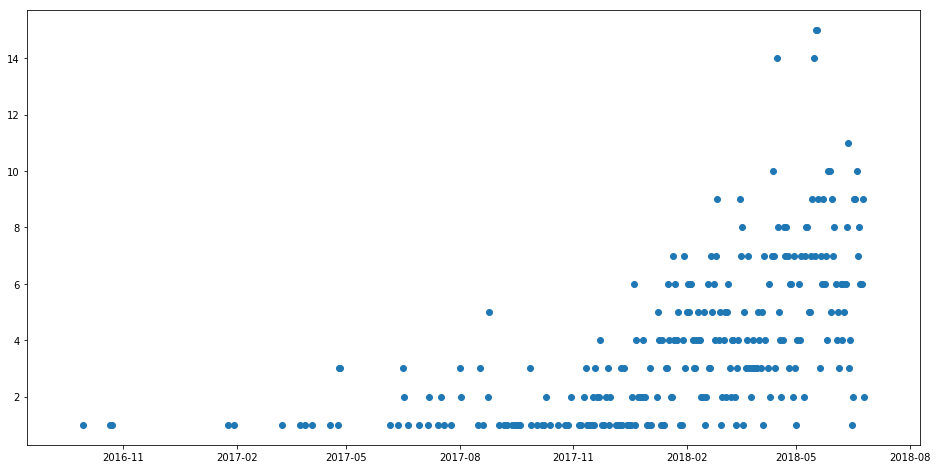

In [19]:
plt.scatter(x=freq_table.index, y = freq_table['count'])

In [34]:
import time
time_int = [time.mktime(i.timetuple()) for i in freq_table.index]

In [52]:
weights = np.polyfit(x=time_int, y = freq_table['count'], deg=4)
print(weights)

[-7.63704287e-30  4.60424582e-20 -1.04083315e-10  1.04563407e-01
 -3.93884168e+07]


In [53]:
model = np.poly1d(weights)
model

poly1d([-7.63704287e-30,  4.60424582e-20, -1.04083315e-10,  1.04563407e-01,
       -3.93884168e+07])

In [54]:
pred = model(time_int)
xp = np.linspace(np.min(time_int), np.max(time_int), 70)
pred_plot = model(xp)

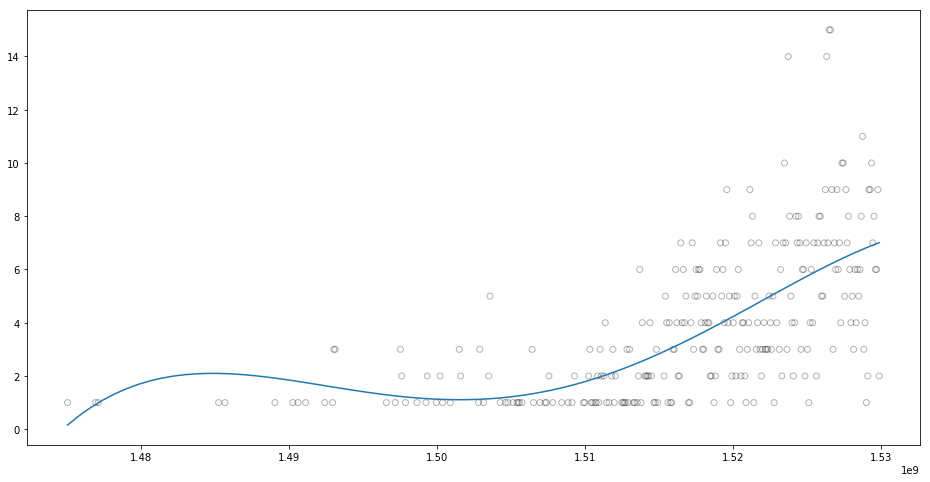

In [55]:
plt.scatter(np.)
plt.scatter(time_int, freq_table['count'], facecolor = 'None', edgecolors= 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.show()
